## Lending Club Dataset Analysis
Much of the code was referenced from the GA lecture notebooks, and several other resources listed at the end of the notebook.

In [4]:
# common data science modules
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['font.size'] = 14

plt.style.use("fivethirtyeight")
# plt.style.use('ggplot')

from IPython.display import HTML
# from ipywidgets import interact

In [44]:
data_path = 'loan.csv'                                       # Kaggle dataset 2007-2015
# data_path = 'DataFiles/Accepted/LoanStats_2007_2015.csv'   # LC direct accepted 2007-2015
# data_path = 'datafiles/LoanStats_2007_2017.csv'            # LC direct accepted 2007-2017
# data_path = 'datafiles/RejectStats_2007_2017.csv'          # LC directrejected  2007-2017
all_loans = pd.read_csv(data_path, parse_dates=['issue_d'], date_parser=pd.to_datetime, low_memory=False)

print all_loans.shape

(887379, 74)


In [6]:
# kaggle data included 74 fields (original LC data included 137 fields) - 13 fields were explored
loans = all_loans[['funded_amnt_inv', 'int_rate', 'term', 'purpose', 'dti', 'addr_state', 'home_ownership', 'emp_length', 'annual_inc', 'grade', 'sub_grade', 'issue_d', 'loan_status']]
loans.head(0)

,funded_amnt_inv,int_rate,term,purpose,dti,addr_state,home_ownership,emp_length,annual_inc,grade,sub_grade,issue_d,loan_status


In [7]:
print ' loans type:', type(loans)
print 'loans shape:', loans.shape
print 'loans index:', loans.index
print
loans.info()

 loans type: <class 'pandas.core.frame.DataFrame'>
loans shape: (887379, 13)
loans index: RangeIndex(start=0, stop=887379, step=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 13 columns):
funded_amnt_inv    887379 non-null float64
int_rate           887379 non-null float64
term               887379 non-null object
purpose            887379 non-null object
dti                887379 non-null float64
addr_state         887379 non-null object
home_ownership     887379 non-null object
emp_length         887379 non-null object
annual_inc         887375 non-null float64
grade              887379 non-null object
sub_grade          887379 non-null object
issue_d            887379 non-null datetime64[ns]
loan_status        887379 non-null object
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 88.0+ MB


In [8]:
# loans.describe(include='all')
loans.describe()   # numeric fields, only

,funded_amnt_inv,int_rate,dti,annual_inc
count,887379.000000,887379.000000,887379.000000,8.873750e+05
mean,14702.464383,13.246740,18.157039,7.502759e+04
std,8442.106732,4.381867,17.190626,6.469830e+04
min,0.000000,5.320000,0.000000,0.000000e+00
25%,8000.000000,9.990000,11.910000,4.500000e+04
50%,13000.000000,12.990000,17.650000,6.500000e+04
75%,20000.000000,16.200000,23.950000,9.000000e+04
max,35000.000000,28.990000,9999.000000,9.500000e+06


In [9]:
# verify no null values
loans.isnull().sum()

funded_amnt_inv    0
int_rate           0
term               0
purpose            0
dti                0
addr_state         0
home_ownership     0
emp_length         0
annual_inc         4
grade              0
sub_grade          0
issue_d            0
loan_status        0
dtype: int64

In [163]:
# ************* cleans object data *************

In [10]:
loans.head(3)

,funded_amnt_inv,int_rate,term,purpose,dti,addr_state,home_ownership,emp_length,annual_inc,grade,sub_grade,issue_d,loan_status
0,4975.0,10.65,36 months,credit_card,27.65,AZ,RENT,10+ years,24000.0,B,B2,2011-12-01,Fully Paid
1,2500.0,15.27,60 months,car,1.00,GA,RENT,< 1 year,30000.0,C,C4,2011-12-01,Charged Off
2,2400.0,15.96,36 months,small_business,8.72,IL,RENT,10+ years,12252.0,C,C5,2011-12-01,Fully Paid


term, home_ownership, emp_length, grade, and sub_grade require conversion to number values

In [165]:
# removes null columns
# all_loans.dropna(axis=1, thresh=866007, inplace=True)
# all_loans.shape

In [11]:
# replaces n/a with NaN
loans.is_copy = False
loans.replace('n/a', np.nan, inplace=True)

In [402]:
# examines 'annual_inc' - max is $9.5M!

# loans.annual_inc.describe()
# loans.annual_inc.sort_values()

# cleans 'annual_income' < $200,000.00

# loans.annual_inc.value_counts()
# loans = loans[(loans['annual_inc'] < 20000.00)]
# print loans.shape
# print
# loans.annual_inc.describe()

In [167]:
# cleans 'term' - '36 months' (1), '60 months' (2)

# #loans.term.fillna(value=0,inplace=True)
# loans['term_clean'] = loans['term'].copy()
# loans.term
# loans['term_clean'] = loans['term'].map({'36 months': 1, '60 months': 2}).copy()
# loans.term_clean
# # loans['term_clean'] = loans['term_clean'].astype(int)
# loans['term_clean'] = loans['term_clean'].apply(lambda term_clean: 1 if term_clean == 0 else 2) 
# loans.term_clean.value_counts()

In [20]:
# cleans 'home_ownership' - OWN(4), MORTGAGE(3), RENT(2), NONE(1), OTHER(0), ANY(4)
loans.home_ownership.fillna(value=0,inplace=True)
loans['home_ownership_clean'] = loans['home_ownership']
loans['home_ownership_clean'] = loans['home_ownership'].map({'OWN':4,'MORTGAGE':3,'RENT':2,'NONE':1,'OTHER':0,'ANY':4})
loans['home_ownership_clean'] = loans['home_ownership_clean'].astype(int)
loans.home_ownership_clean.value_counts().sort_index()

0       182
1        50
2    356117
3    443557
4     87473
Name: home_ownership_clean, dtype: int64

In [21]:
# cleans 'emp_length' - categorizes <1 and 1 as 1
loans.emp_length.fillna(value=0,inplace=True)
loans['emp_length_clean'] = loans['emp_length']
loans['emp_length_clean'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loans['emp_length_clean'] = loans['emp_length_clean'].astype(int)
loans.emp_length_clean.value_counts().sort_index()

0      44825
1     127700
2      78870
3      70026
4      52529
5      55704
6      42950
7      44594
8      43955
9      34657
10    291569
Name: emp_length_clean, dtype: int64

In [22]:
# clean 'grade'
loans.grade.fillna(value=0,inplace=True)
loans['grade_clean'] = loans['grade']
loans['grade_clean'].replace(to_replace='[^A-G]+', value='', inplace=True, regex=True)
loans['grade_clean'] = loans['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
loans['grade_clean'] = loans['grade_clean'].astype(int)
loans.grade_clean.value_counts().sort_index()

1      5489
2     23046
3     70705
4    139542
5    245860
6    254535
7    148202
Name: grade_clean, dtype: int64

In [171]:
# clean 'sub_grade'

In [172]:
# cleans 'loan_status'
# loans.loan_status.fillna(value=0,inplace=True)
# loans['loan_status_clean'] = loans['loan_status'].copy
# loans['loan_status_clean'].replace(to_replace='[^A-G]+', value='', inplace=True, regex=True)

# loans['loan_status_clean'] = loans['loan_status_clean'].astype(int)
# loans.loan_status_clean.value_counts()

In [23]:
# examine target values
loans.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

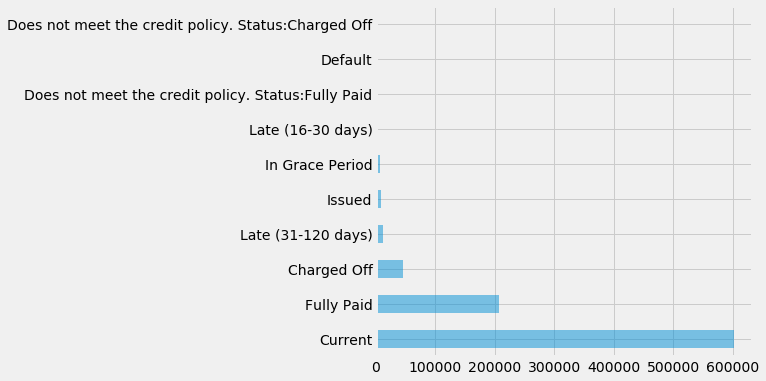

In [24]:
loans.loan_status.value_counts().plot(kind='barh',alpha=.50);

In [25]:
# verify conversions
loans.head(3)

,funded_amnt_inv,int_rate,term,purpose,dti,addr_state,home_ownership,emp_length,annual_inc,grade,sub_grade,issue_d,loan_status,home_ownership_clean,emp_length_clean,grade_clean
0,4975.0,10.65,36 months,credit_card,27.65,AZ,RENT,10+ years,24000.0,B,B2,2011-12-01,Fully Paid,2,10,6
1,2500.0,15.27,60 months,car,1.00,GA,RENT,< 1 year,30000.0,C,C4,2011-12-01,Charged Off,2,1,5
2,2400.0,15.96,36 months,small_business,8.72,IL,RENT,10+ years,12252.0,C,C5,2011-12-01,Fully Paid,2,10,5


In [26]:
# removes Current, Issued, Does not meet the credit policy. Status:Fully Paid, and Does not meet the credit policy. Status:Charged Off
# the meaning of the last two is inconclusice, and they take up a very small percentage of the total amount
loans.is_copy = False
loans.drop(loans[(loans.loan_status == 'Current') | (loans.loan_status == 'Issued') | (loans.loan_status == 'Does not meet the credit policy. Status:Fully Paid') | (loans.loan_status == 'Does not meet the credit policy. Status:Charged Off') ].index, inplace=True)
loans.loan_status.value_counts()

Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

In [27]:
# consolidates Default, Charged Off, In Grace Period, Late (16-30 days), Late (31-120 days) as default or delinquent (loan_status_clean)
loans['loan_status_clean'] = loans['loan_status'].copy()
loans['loan_status_clean'] = loans['loan_status'].map({'Fully Paid': 0, 'Default': 1, 'Charged Off':1, 'In Grace Period':1, 'Late(16-30 days)':1, 'Late(31-120 days)':1})
# loans = loans[(loans.loan_status_clean == 0) | (loans.loan_status_clean == 1)]
# converts mapped decimal values to integers
loans["loan_status_clean"] = loans["loan_status_clean"].apply(lambda loan_status_clean: 0 if loan_status_clean == 0 else 1)

In [28]:
# class 0 = fully paid loans, class 1 = defaulted/delinquent loans
loans.loan_status_clean.value_counts()

0    207723
1     66668
Name: loan_status_clean, dtype: int64

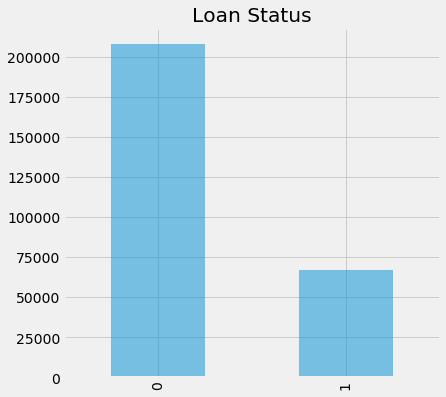

In [29]:
# compare target values for Fully Paid and Default/Delinquent
loans.loan_status_clean.value_counts().plot(kind='bar', title='Loan Status', alpha=.50);

In [30]:
# verify _clean values (to the right)
loans.head()

,funded_amnt_inv,int_rate,term,purpose,dti,addr_state,home_ownership,emp_length,annual_inc,grade,sub_grade,issue_d,loan_status,home_ownership_clean,emp_length_clean,grade_clean,loan_status_clean
0,4975.0,10.65,36 months,credit_card,27.65,AZ,RENT,10+ years,24000.0,B,B2,2011-12-01,Fully Paid,2,10,6,0
1,2500.0,15.27,60 months,car,1.00,GA,RENT,< 1 year,30000.0,C,C4,2011-12-01,Charged Off,2,1,5,1
2,2400.0,15.96,36 months,small_business,8.72,IL,RENT,10+ years,12252.0,C,C5,2011-12-01,Fully Paid,2,10,5,0
3,10000.0,13.49,36 months,other,20.00,CA,RENT,10+ years,49200.0,C,C1,2011-12-01,Fully Paid,2,10,5,0
5,5000.0,7.90,36 months,wedding,11.20,AZ,RENT,3 years,36000.0,A,A4,2011-12-01,Fully Paid,2,3,7,0


### Features Exploration
#### Of the 137 fields Lending Club provides, the Kaggle dataset narrowed it down to and provided 74 fields.
#### The following 13 were chosen for this EDA:
'funded_amnt_inv', 'int_rate', 'term', 'purpose', 'dti', 'addr_state', 'home_ownership', 'emp_length', 'annual_inc', 'grade', 'sub_grade', 'issue_d', 'loan_status'


**funded_amnt** - The total amount committed by investors for that loan at that point in time.

**int_rate** - Interest Rate on the loan.

**term** - The number of payments on the loan. Values are in months and can be either 36 or 60.

**purpose** - A category provided by the borrower for the loan request.

**dti** - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**addr_state** - The state provided by the borrower in the loan application.

**home_ownership** - The home ownership status provided by the borrower during registration or obtained from the credit report. Values are: RENT, OWN, MORTGAGE, OTHER, NONE

**emp_length** - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

**annual_inc** - The self-reported annual income provided by the borrower during registration.

**grade** - LC assigned loan grade (A-G).

**sub_grade** - LC assigned loan subgrade (1, 2, 3,... after grade).

**issue_d** - The month-year which the loan was funded.

**loan_status** - [TARGET VALUE] Current status of the loan.

#### Response and Features List:

Target: [['loan_status_clean']]

[['funded_amnt_inv', 'int_rate', 'dti', 'annual_inc', 'home_ownership_clean', 'emp_length_clean', 'grade_clean']]

In [31]:
# loans[['funded_amnt_inv', 'int_rate', 'dti', 'annual_inc', 'home_ownership_clean', 'emp_length_clean', 'grade_clean', 'loan_status_clean']]

# all features
features = loans[['funded_amnt_inv', 'int_rate', 'dti', 'annual_inc', 'home_ownership_clean', 'emp_length_clean', 'grade_clean']]

# no 'int_rate' - correlates with 'grade_clean'
# features = loans[['funded_amnt_inv', 'dti', 'annual_inc', 'home_ownership_clean', 'emp_length_clean', 'grade_clean']]

# no 'grade_clean' - correlates with 'int_rate'
# features = loans[['funded_amnt_inv', 'int_rate', 'dti', 'annual_inc', 'home_ownership_clean', 'emp_length_clean']]

print 'features type:', type(features)
print 'features shape:', features.shape
print 'features index:', features.index
features.head()

features type: <class 'pandas.core.frame.DataFrame'>
features shape: (274391, 7)
features index: Int64Index([     0,      1,      2,      3,      5,      7,      8,      9,
                10,     11,
            ...
            887332, 887337, 887345, 887346, 887347, 887351, 887364, 887366,
            887369, 887371],
           dtype='int64', length=274391)


,funded_amnt_inv,int_rate,dti,annual_inc,home_ownership_clean,emp_length_clean,grade_clean
0,4975.0,10.65,27.65,24000.0,2,10,6
1,2500.0,15.27,1.00,30000.0,2,1,5
2,2400.0,15.96,8.72,12252.0,2,10,5
3,10000.0,13.49,20.00,49200.0,2,10,5
5,5000.0,7.90,11.20,36000.0,2,3,7


In [32]:
cor = features.corr()
cor

,funded_amnt_inv,int_rate,dti,annual_inc,home_ownership_clean,emp_length_clean,grade_clean
funded_amnt_inv,1.000000,0.221882,0.060505,0.322837,0.128745,0.133904,-0.214617
int_rate,0.221882,1.000000,0.178111,-0.026444,-0.042562,0.026192,-0.951040
dti,0.060505,0.178111,1.000000,-0.168640,0.013245,0.036366,-0.162303
annual_inc,0.322837,-0.026444,-0.168640,1.000000,0.098388,0.093959,0.017465
home_ownership_clean,0.128745,-0.042562,0.013245,0.098388,1.000000,0.147160,0.038758
emp_length_clean,0.133904,0.026192,0.036366,0.093959,0.147160,1.000000,-0.017943
grade_clean,-0.214617,-0.951040,-0.162303,0.017465,0.038758,-0.017943,1.000000


In [33]:
# summarizes feature correlations by threshold - highlights'int_rate' and 'grade_clean' correlation
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.2) | (cor < -0.2)]

int_rate     funded_amnt_inv    0.221882
annual_inc   funded_amnt_inv    0.322837
grade_clean  funded_amnt_inv   -0.214617
             int_rate          -0.951040
dtype: float64

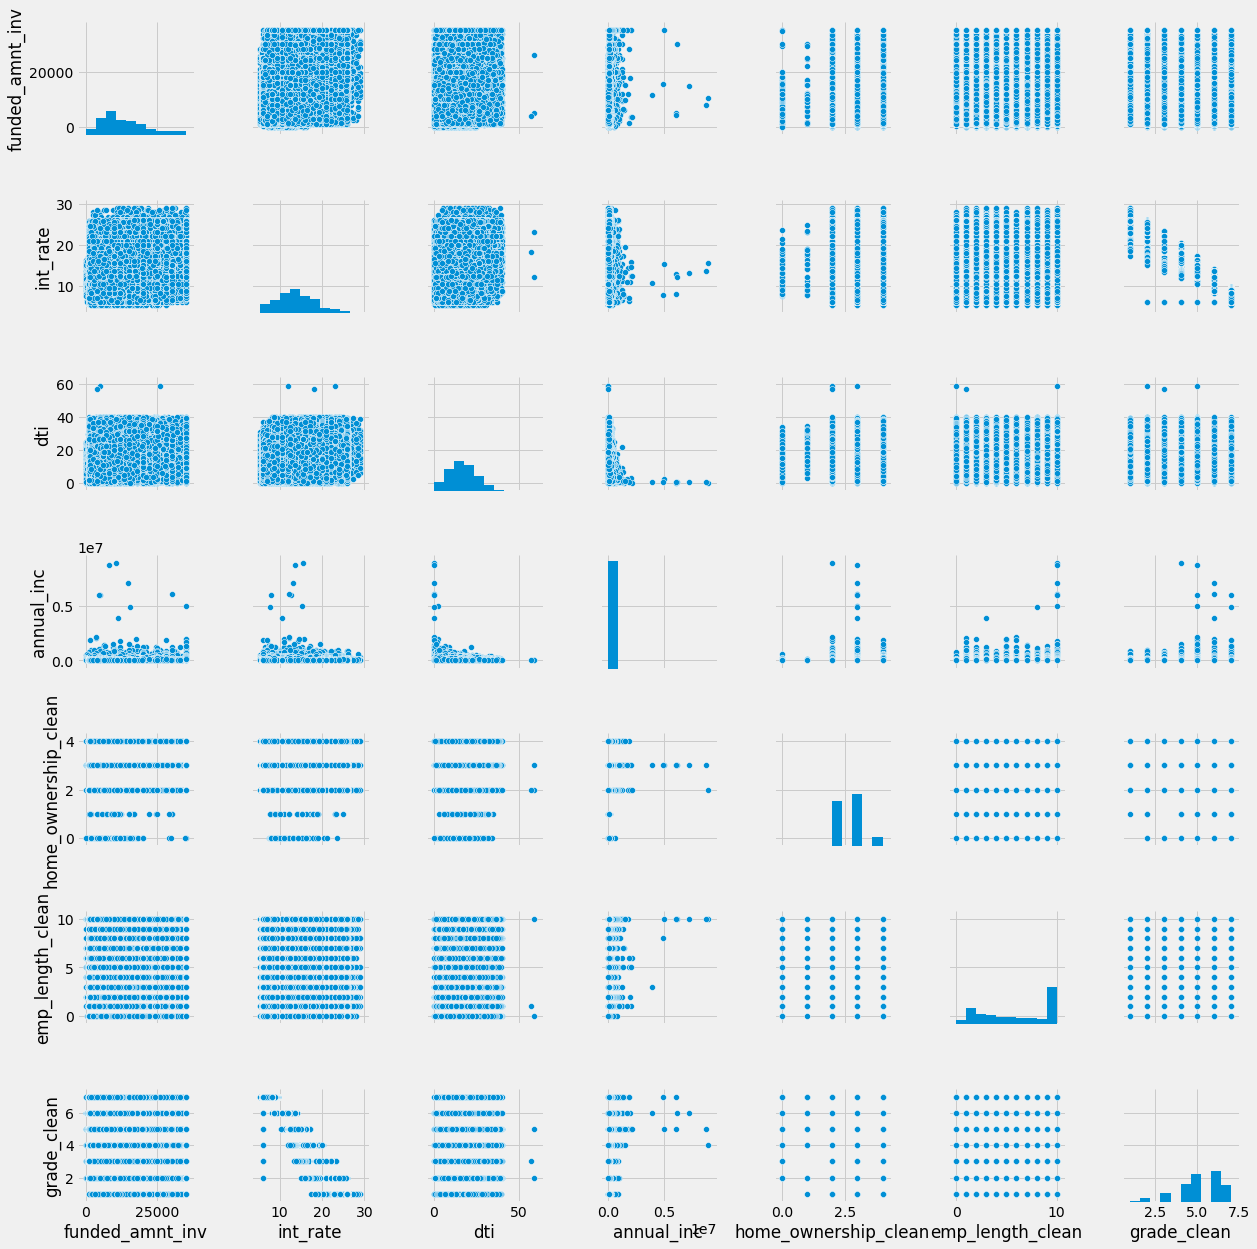

In [309]:
# plots a correlation pairplot - hints at # plots a correlation heat map - reveals 'int_rate' and 'grade_clean' correlation
sns.pairplot(features);

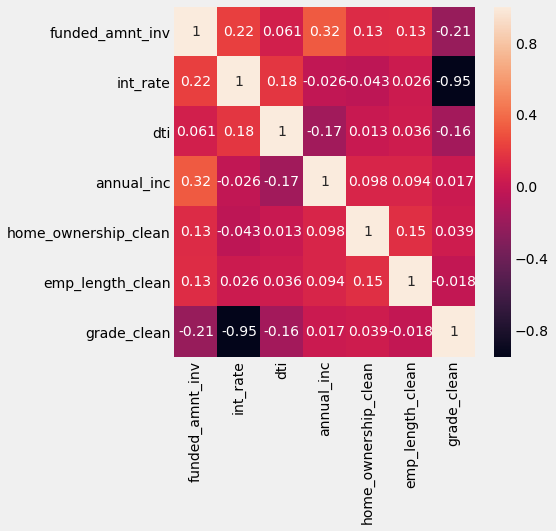

In [34]:
# plots a correlation heat map - reveals 'int_rate' and 'grade_clean' correlation
sns.heatmap(features.corr(), annot=True);

In [35]:
# features selection
# features = loans[['funded_amnt_inv', 'int_rate', 'dti', 'grade_clean']]
# features = loans[['funded_amnt_inv', 'dti', 'grade_clean']]
features = loans[['funded_amnt_inv', 'int_rate', 'dti']]
print type(features)
features.head()

<class 'pandas.core.frame.DataFrame'>


,funded_amnt_inv,int_rate,dti
0,4975.0,10.65,27.65
1,2500.0,15.27,1.00
2,2400.0,15.96,8.72
3,10000.0,13.49,20.00
5,5000.0,7.90,11.20


In [36]:
# features selected to not show strong correlation to each other
cor = features.corr()
cor

,funded_amnt_inv,int_rate,dti
funded_amnt_inv,1.000000,0.221882,0.060505
int_rate,0.221882,1.000000,0.178111
dti,0.060505,0.178111,1.000000


In [37]:
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.3) | (cor < -0.3)]

Series([], dtype: float64)

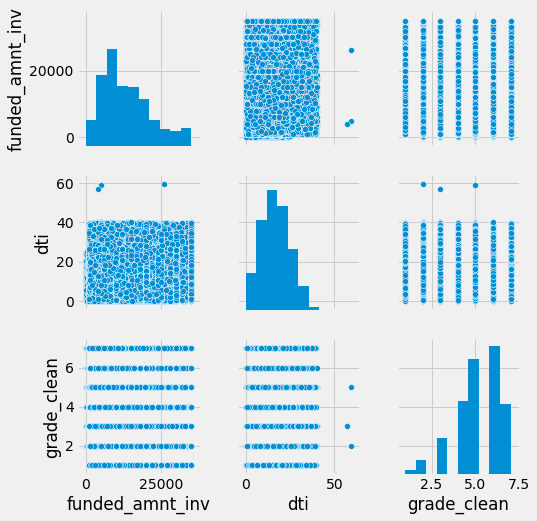

In [37]:
sns.pairplot(features);

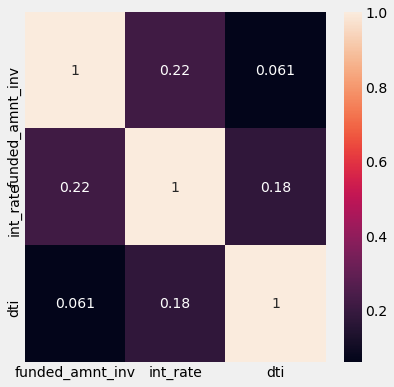

In [38]:
# plots correlation heat map
sns.heatmap(features.corr(), annot=True);

In [39]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
funded_amnt_inv,274391.0,13604.749668,8186.388299,0.00,7300.00,12000.00,18475.00,35000.00
int_rate,274391.0,13.922626,4.432766,5.32,10.99,13.67,16.99,28.99
dti,274391.0,16.786753,7.886752,0.00,10.92,16.44,22.29,59.26


In [518]:
# muliti-linear regression
# Create a features col
# feature_cols = ['funded_amnt_inv', 'int_rate', 'dti', 'grade_clean'] 
# feature_cols = ['funded_amnt_inv', 'dti', 'grade_clean']
# feature_cols = ['funded_amnt_inv', 'int_rate', 'dti']

In [523]:
# multiple scatter plots in Seaborn
# sns.pairplot(loans, x_vars=feature_cols, y_vars='loan_status_clean', kind='reg')

In [522]:
# from sklearn.linear_model import LinearRegression

# # create X and y
# X = loans[feature_cols]
# y = loans.loan_status_clean

# # instantiate and fit
# linreg = LinearRegression()
# linreg.fit(X, y)

# # print the coefficients
# print 'LR Intercept:', linreg.intercept_
# # pair the feature names with the coefficients
# zip(feature_cols, linreg.coef_)

In [521]:
# two_features = ['int_rate', 'grade_clean']
# # create X and y
# X = loans[two_features]
# y = loans.loan_status_clean

# # instantiate and fit
# linreg = LinearRegression()
# linreg.fit(X, y)

# # print the coefficients
# print linreg.intercept_
# print linreg.coef_

In [520]:
# two_features = ['int_rate']
# # create X and y
# X = loans[two_features]
# y = loans.loan_status_clean

# # instantiate and fit
# linreg = LinearRegression()
# linreg.fit(X, y)

# # print the coefficients
# print linreg.intercept_
# print linreg.coef_

In [519]:
# two_features = ['grade_clean']
# # create X and y
# X = loans[two_features]
# y = loans.loan_status_clean

# # instantiate and fit
# linreg = LinearRegression()
# linreg.fit(X, y)

# # print the coefficients
# print linreg.intercept_
# print linreg.coef_

In [40]:
# KNN Classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [41]:
# feature selection and X, y assignments

# feature_cols = ['funded_amnt_inv', 'int_rate', 'dti', 'grade_clean']
feature_cols = ['funded_amnt_inv', 'dti', 'grade_clean']
# feature_cols = ['funded_amnt_inv', 'int_rate', 'dti']

X = loans[feature_cols]
y = loans.loan_status_clean

In [42]:
print X.shape
print y.shape

(274391, 3)
(274391,)


In [43]:
# splits X and y into training and testing sets (random_state is set for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)    # stratify = loans.loan_status_clean

# extablishes Null baseline accuracy
y_test.value_counts().head(1) / len(y_test)

0    0.756305
Name: loan_status_clean, dtype: float64

In [45]:
# trains the model using K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [46]:
# tests the model on the testing set and checks accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.662118429109


In [47]:
# repeats for K=50
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.755984139479


In [47]:
# 50/50 for 1 neighbor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.5)   # stratify = loans.loan_status_clean


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.664210326832


In [48]:
X_train.shape

(205793, 3)

In [50]:
X_test.shape

(68598, 3)

In [ ]:
# evaluate test accuracy for K = number of rows in the training data (interrupts!!!)
knn = KNeighborsClassifier(n_neighbors=X_train.shape[0])
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
# compares test accuracy with Null accuracy (predicting the most frequent class)
y_test.value_counts()   # examines class distribution

In [51]:
# tuning model

# instantiates the model (using the value K=5).
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred_class = knn.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7992499754


In [52]:
# calculates predicted probabilities of class membership.
knn.predict_proba(X)

array([[ 0.8,  0.2],
       [ 0.8,  0.2],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.2,  0.8]])

In [53]:
# view training data accuracies

k_range = range(1,40)
accuracies = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    accuracy = float(sum(pred == y)) / len(y)
    accuracies.append([k, accuracy])

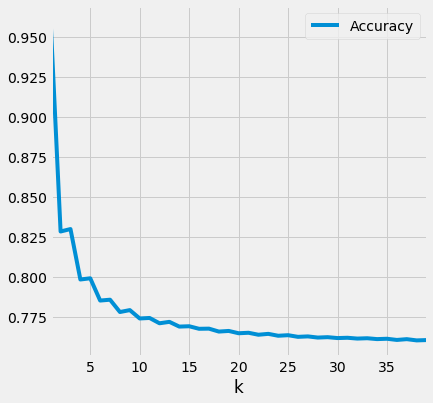

In [54]:
data = pd.DataFrame(accuracies, columns=['k','Accuracy'])
data.plot.line(x='k',y='Accuracy');

In [61]:
# finds the maximum testing accuracy and the associated K value.
data.sort_values('Accuracy').tail(10)

,k,Accuracy
10,11,0.776862
7,8,0.780463
8,9,0.780667
5,6,0.786935
6,7,0.787774
3,4,0.800121
4,5,0.800788
1,2,0.831919
2,3,0.832841
0,1,0.997387


In [62]:
# alternative method:
max(zip(data.Accuracy, k_range))

(0.99738694053376387, 1)

In [55]:
# calculates TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = range(1, 101)
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # instantiates the model with the current value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # calculates training error (error = 1 - accuracy)
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # calculates testing error
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [56]:
# creates a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,testing error,training error
K,,
100,0.243710,0.242311
99,0.243768,0.242340
98,0.243783,0.242369
97,0.244045,0.242355
96,0.243928,0.242355


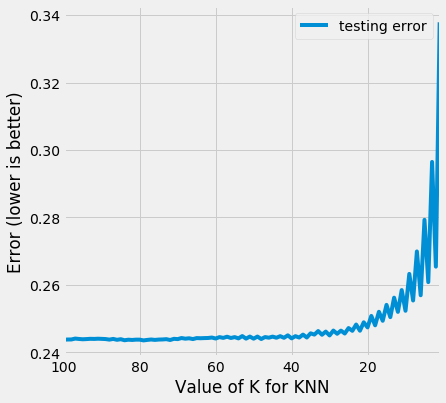

In [57]:
# plots the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [58]:
# finds the minimum testing error and the associated K value.
df.sort_values('testing error').head()

,testing error,training error
K,,
79,0.243506,0.241961
84,0.243549,0.242191
72,0.243622,0.241961
82,0.243637,0.242158
76,0.243651,0.242056


In [59]:
# alternative method:
min(zip(testing_error, k_range))

(0.24350564156389398, 79)

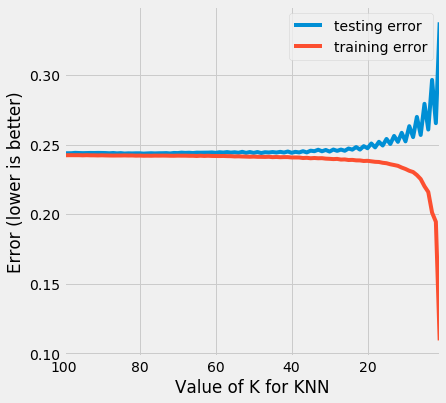

In [60]:
# plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [61]:
# Standardize the predictor matrix

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [62]:
# find the best K

from sklearn.model_selection import cross_val_score

def find_best_k_cls(X, y, k_min=1, k_max=51, step=2, cv=5):
    k_range = range(k_min, k_max+1, step)
    test_acc_std = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=cv)
        test_acc_std.append(np.mean(scores))
    print np.max(test_acc_std), np.argmax(k_range)
    return np.argmax(k_range)    

In [63]:
find_best_k_cls(Xs, y)

0.755757212847 25


25

In [75]:
# fit KNeighborsClassifier with best number of neighbors K=25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(Xs, y)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.348727368145


In [76]:
print Xs.shape
print y.shape

(274391, 4)
(274391,)


In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [64]:
# calculates testing error.
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print testing_error

0.247164640369


In [ ]:
# plots test accuracy by number of neighbors

test_acc = []

for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, X_train.shape[0]+1), test_acc, lw=3.)
plt.show()

### The following take a very long time to complete since it involves the max iterations - save for later

In [ ]:
# fits KNN across different values of K and plot the mean cross-validated accuracy with 5 folds

from sklearn.model_selection import cross_val_score

folds = 5
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

print max_neighbors

# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))

In [ ]:

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, int(max_neighbors)), test_acc, lw=3.)
plt.show()

### Next Steps

### Logistic Regression - WIP

In [ ]:
# models the data, use a cross validation technique
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

lr = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X,y)  # , stratify=X.target
lr.fit(x_train,y_train)

# model predict
y_pred = lr.predict(x_test)

# evaluates model preformance with a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

In [ ]:
# uses predict_proba to find out.
lr.predict_proba(x_test)

for a,b,c in lr.predict_proba(x_test):
    print sum([a,b,c])

In [ ]:
from sklearn.metrics import classification_report

print classification_report(y_test, y_pred)

### References
References:

Kaggle.com original dataset, kernel, general dataset information
https://www.kaggle.com/wendykan/lending-club-loan-data/data

Lending Club Information, Dataset, and Statistics
https://www.lendingclub.com/info/statistics.action

General Assembly Lesson Notebooks (Code)
https://git.generalassemb.ly/ds-virtual-1-bah-08-2017

Loan Data (2007-2011) From Lending Club (Code)
http://nbviewer.jupyter.org/gist/odubno/0b767a47f75adb382246

Machine Learning and Statistics Blog - Lending Club Data Analysis Revisited with Python
http://kldavenport.com/lending-club-data-analysis-revisted-with-python/

Default Rates at Lending Club & Prosper: When Loans Go Bad
http://www.lendingmemo.com/lending-club-prosper-default-rates/

Predicting Defaults of Loans using Lending Club’s Loan Data
http://res.cloudinary.com/general-assembly-profiles/image/upload/v1416535475/uwumoooppttsmpgu1goo.pdf


### Scratch

In [ ]:
# remove data before 2010 - unusual market

# min_month = pd.to_datetime('2014-1-1')
# print min_month
# loans[(loans.issue_d > min_month)]   # .shape.describe()

In [304]:
# Are target and feature x correlated?
# loans.plot(kind='bar', x='int_rate', y='dti')
# print(loans['loan_status_clean'].corr())       # Correlation coefficients

In [ ]:
# Pandas scatter plot
# bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2);   # ";" conceals the object
loans.plot(kind='scatter', x='dti', y='loan_amnt', alpha=0.2)